## Exploratory data analysis: Spanish data rail ticket

In [12]:
#importamos librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## EDA <a class="anchor" id="first-bullet"></a>

In [13]:
df = pd.read_csv(r"C:\Users\HECTOR\OneDrive - Escuela Militar de Ingenieria\Documents\Master\Tareas\EDA\venv\tren.csv")

In [16]:
df = df.iloc[:500000]
df

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date
0,1,renfe,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,3.08,AVE,Preferente,68.95,Promo,NaN,{},2019-04-11 21:49:46
1,2,renfe,MADRID,BARCELONA,2019-04-18 13:25:00,2019-04-18 16:24:00,2.98,AVE-TGV,Turista,107.70,Flexible,NaN,{},2019-04-11 21:49:46
2,3,renfe,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,2.83,AVE,Turista,75.40,Promo,NaN,{},2019-04-11 21:49:46
3,4,renfe,MADRID,BARCELONA,2019-04-18 15:30:00,2019-04-18 18:40:00,3.17,AVE,Preferente,NaN,Promo,NaN,{},2019-04-11 21:49:46
4,5,renfe,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,2.50,AVE,Turista Plus,106.75,Promo,NaN,{},2019-04-11 21:49:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499996,renfe,MADRID,VALENCIA,2019-05-08 14:10:00,2019-05-08 16:03:00,1.88,AVE,Turista,33.65,Promo,NaN,{},2019-04-14 06:30:15
499996,499997,renfe,MADRID,VALENCIA,2019-05-08 15:40:00,2019-05-08 17:22:00,1.70,AVE,Turista,45.30,Promo,NaN,{},2019-04-14 06:30:15
499997,499998,renfe,MADRID,VALENCIA,2019-05-08 15:40:00,2019-05-08 17:22:00,1.70,AVE,Turista,45.30,Promo,NaN,{},2019-04-14 06:30:15
499998,499999,renfe,MADRID,VALENCIA,2019-05-08 09:40:00,2019-05-08 11:24:00,1.73,AVE,Turista,39.45,Promo,NaN,{},2019-04-14 06:30:15


In [17]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             500000 non-null  int64  
 1   company        500000 non-null  object 
 2   origin         500000 non-null  object 
 3   destination    500000 non-null  object 
 4   departure      500000 non-null  object 
 5   arrival        500000 non-null  object 
 6   duration       500000 non-null  float64
 7   vehicle_type   500000 non-null  object 
 8   vehicle_class  498536 non-null  object 
 9   price          245843 non-null  float64
 10  fare           498536 non-null  object 
 11  seats          0 non-null       float64
 12  meta           500000 non-null  object 
 13  insert_date    500000 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 53.4+ MB
None
                  id       duration          price  seats
count  500000.000000  500000.000000  24584

In [22]:
df_high_prices = df.loc[df["price"]>150]
df_high_prices

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date
74,75,renfe,MADRID,BARCELONA,2019-04-22 16:30:00,2019-04-22 19:15:00,2.75,AVE,Preferente,181.5,Flexible,NaN,{},2019-04-11 21:50:04
94,95,renfe,MADRID,BARCELONA,2019-04-22 19:30:00,2019-04-22 22:40:00,3.17,AVE,Preferente,181.5,Flexible,NaN,{},2019-04-11 21:50:04
136,137,renfe,MADRID,BARCELONA,2019-04-22 13:25:00,2019-04-22 16:24:00,2.98,AVE-TGV,Preferente,181.5,Flexible,NaN,{},2019-04-11 21:50:04
149,150,renfe,MADRID,BARCELONA,2019-04-22 11:30:00,2019-04-22 14:40:00,3.17,AVE,Preferente,181.5,Flexible,NaN,{},2019-04-11 21:50:04
151,152,renfe,MADRID,BARCELONA,2019-04-22 12:30:00,2019-04-22 15:30:00,3.00,AVE,Preferente,181.5,Flexible,NaN,{},2019-04-11 21:50:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493233,493234,renfe,MADRID,BARCELONA,2019-04-16 09:30:00,2019-04-16 12:34:00,3.07,AVE,Preferente,181.5,Flexible,NaN,{},2019-04-14 06:06:22
493305,493306,renfe,MADRID,BARCELONA,2019-04-15 11:30:00,2019-04-15 14:40:00,3.17,AVE,Preferente,181.5,Flexible,NaN,{},2019-04-14 06:06:38
493345,493346,renfe,MADRID,BARCELONA,2019-04-15 11:30:00,2019-04-15 14:40:00,3.17,AVE,Preferente,181.5,Flexible,NaN,{},2019-04-14 06:06:38
493349,493350,renfe,MADRID,BARCELONA,2019-04-14 18:00:00,2019-04-14 20:30:00,2.50,AVE,Preferente,214.2,Flexible,NaN,{},2019-04-14 06:06:54


**Null Data**

In [23]:
print(df.isnull().sum())

id                    0
company               0
origin                0
destination           0
departure             0
arrival               0
duration              0
vehicle_type          0
vehicle_class      1464
price            254157
fare               1464
seats            500000
meta                  0
insert_date           0
dtype: int64


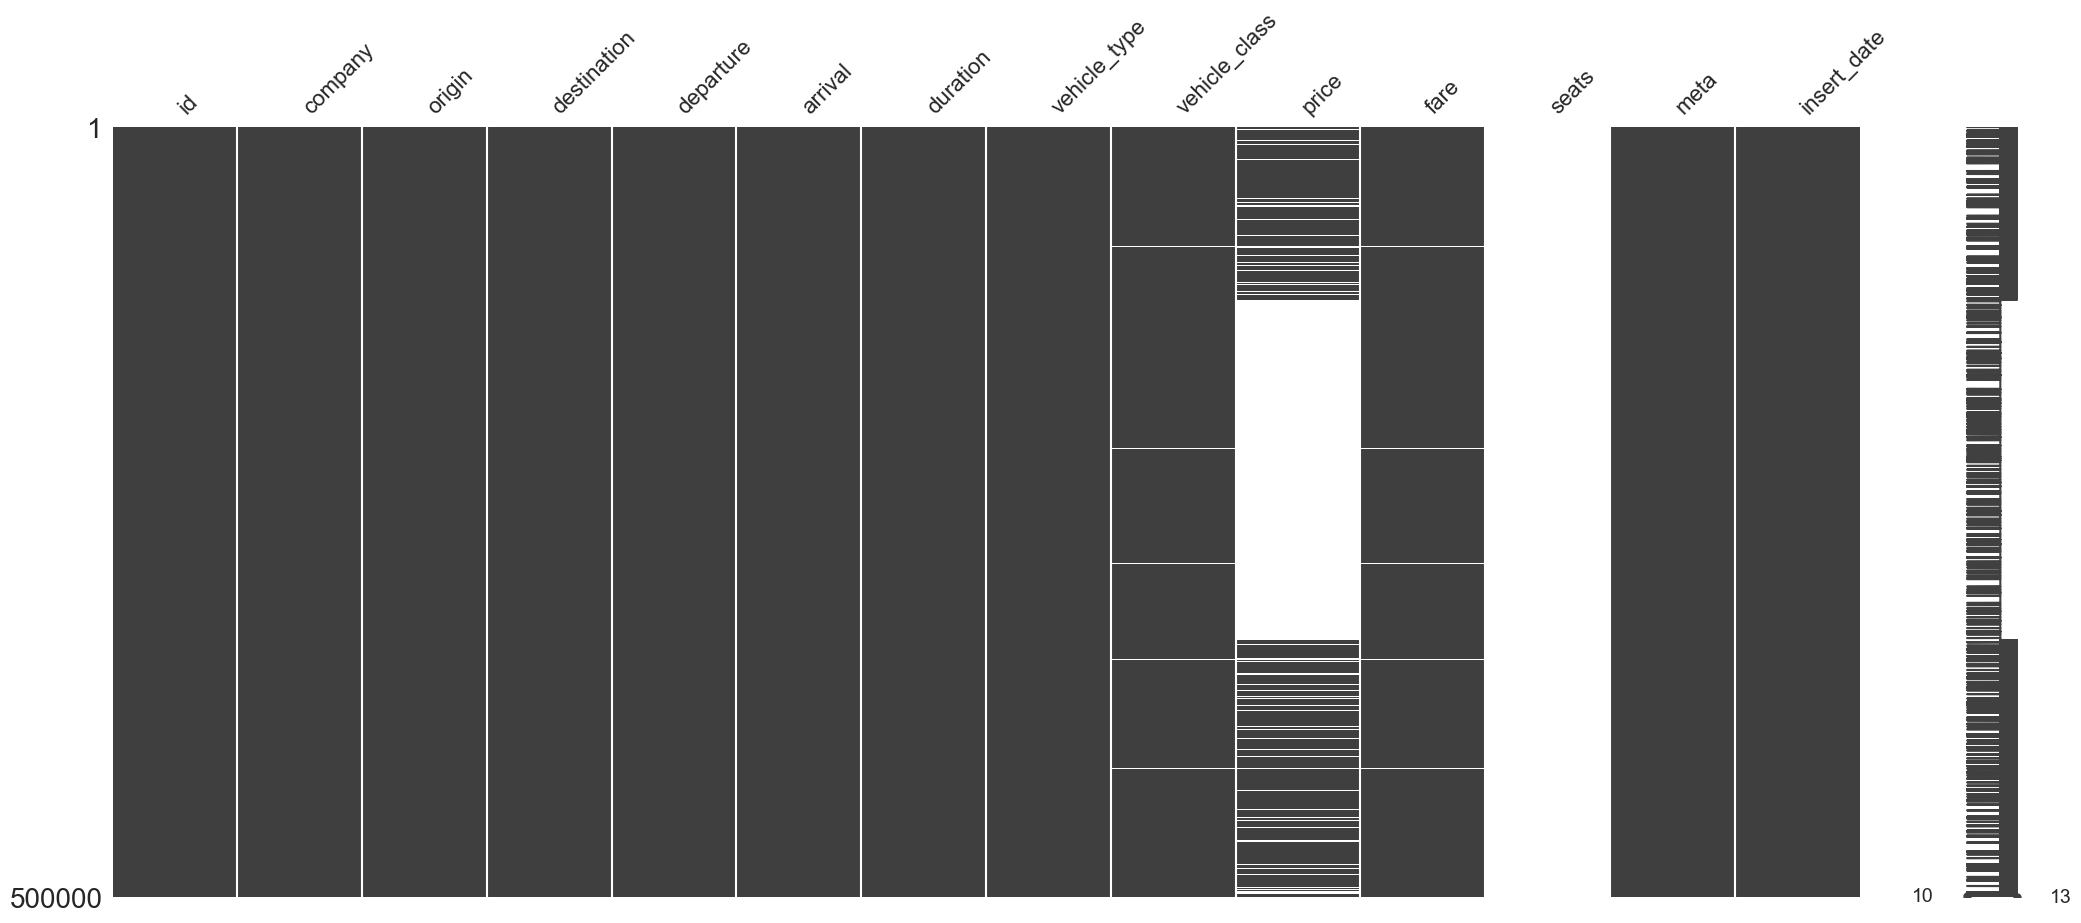

In [24]:
msno.matrix(df)
plt.show()

**Data Visualization**

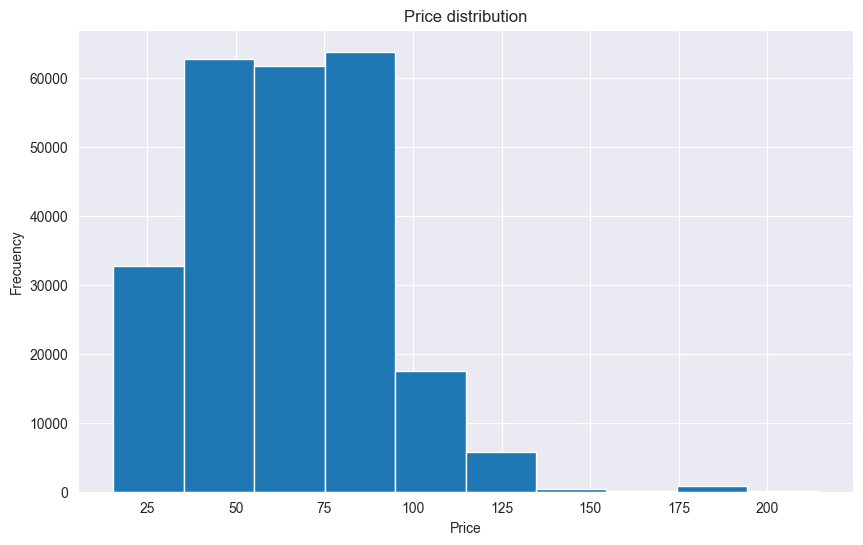

In [26]:
plt.figure(figsize=(10,6))
df["price"].hist(bins=10)
plt.title("Price distribution")
plt.xlabel("Price")
plt.ylabel("Frecuency")
plt.show()

We will proceed to eliminate outliers which are distorting the price histogram, from which we proceed with the elimination with the values that are outside the interquartile range (IQR).

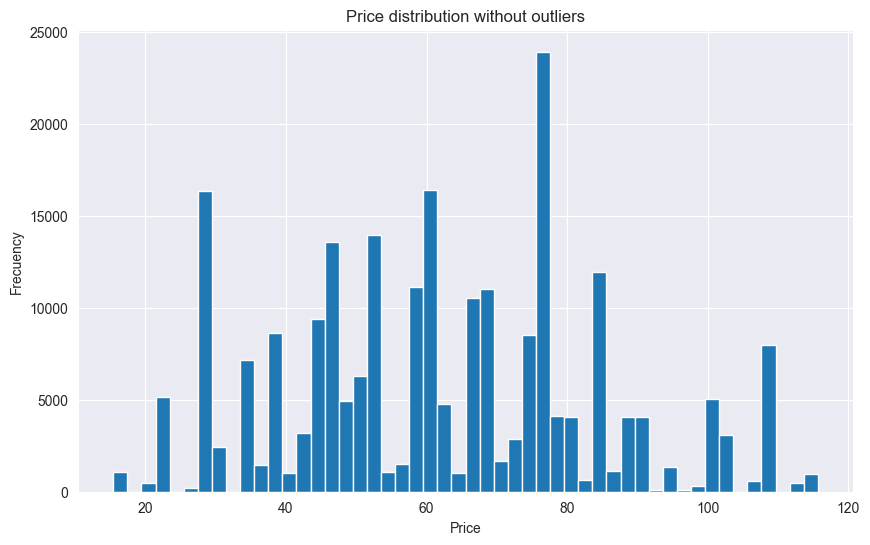

In [27]:

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

#outliers
lowe_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_df = df[(df["price"] >= lowe_bound) & (df["price"] <= upper_bound)]

#Plot
plt.figure(figsize=(10,6))
filtered_df["price"].hist(bins=50)
plt.title("Price distribution without outliers")
plt.xlabel("Price")
plt.ylabel("Frecuency")
plt.show()

**Highest price tickets**

In [28]:
filtered_df

,id,company,origin,destination,departure,arrival,duration,vehicle_type,vehicle_class,price,fare,seats,meta,insert_date
0,1,renfe,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,3.08,AVE,Preferente,68.95,Promo,NaN,{},2019-04-11 21:49:46
1,2,renfe,MADRID,BARCELONA,2019-04-18 13:25:00,2019-04-18 16:24:00,2.98,AVE-TGV,Turista,107.70,Flexible,NaN,{},2019-04-11 21:49:46
2,3,renfe,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,2.83,AVE,Turista,75.40,Promo,NaN,{},2019-04-11 21:49:46
4,5,renfe,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,2.50,AVE,Turista Plus,106.75,Promo,NaN,{},2019-04-11 21:49:46
5,6,renfe,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,2.83,AVE,Turista,75.40,Promo,NaN,{},2019-04-11 21:49:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499996,renfe,MADRID,VALENCIA,2019-05-08 14:10:00,2019-05-08 16:03:00,1.88,AVE,Turista,33.65,Promo,NaN,{},2019-04-14 06:30:15
499996,499997,renfe,MADRID,VALENCIA,2019-05-08 15:40:00,2019-05-08 17:22:00,1.70,AVE,Turista,45.30,Promo,NaN,{},2019-04-14 06:30:15
499997,499998,renfe,MADRID,VALENCIA,2019-05-08 15:40:00,2019-05-08 17:22:00,1.70,AVE,Turista,45.30,Promo,NaN,{},2019-04-14 06:30:15
499998,499999,renfe,MADRID,VALENCIA,2019-05-08 09:40:00,2019-05-08 11:24:00,1.73,AVE,Turista,39.45,Promo,NaN,{},2019-04-14 06:30:15


C:\Users\HECTOR\AppData\Local\Temp\ipykernel_11900\2530198572.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(filtered_df['price'].sample(1500),rug=True)
C:\Users\HECTOR\PycharmProjects\pythonProject4\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HECTOR\PycharmProjects\pythonProject4\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf val

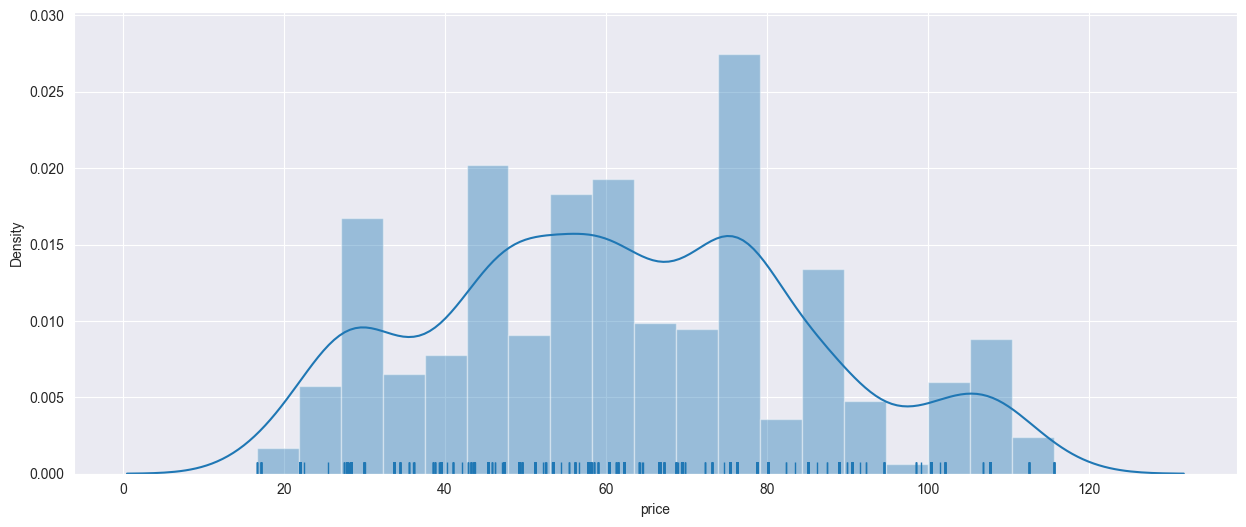

In [29]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.distplot(filtered_df['price'].sample(1500),rug=True)
plt.show()

C:\Users\HECTOR\PycharmProjects\pythonProject4\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HECTOR\PycharmProjects\pythonProject4\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


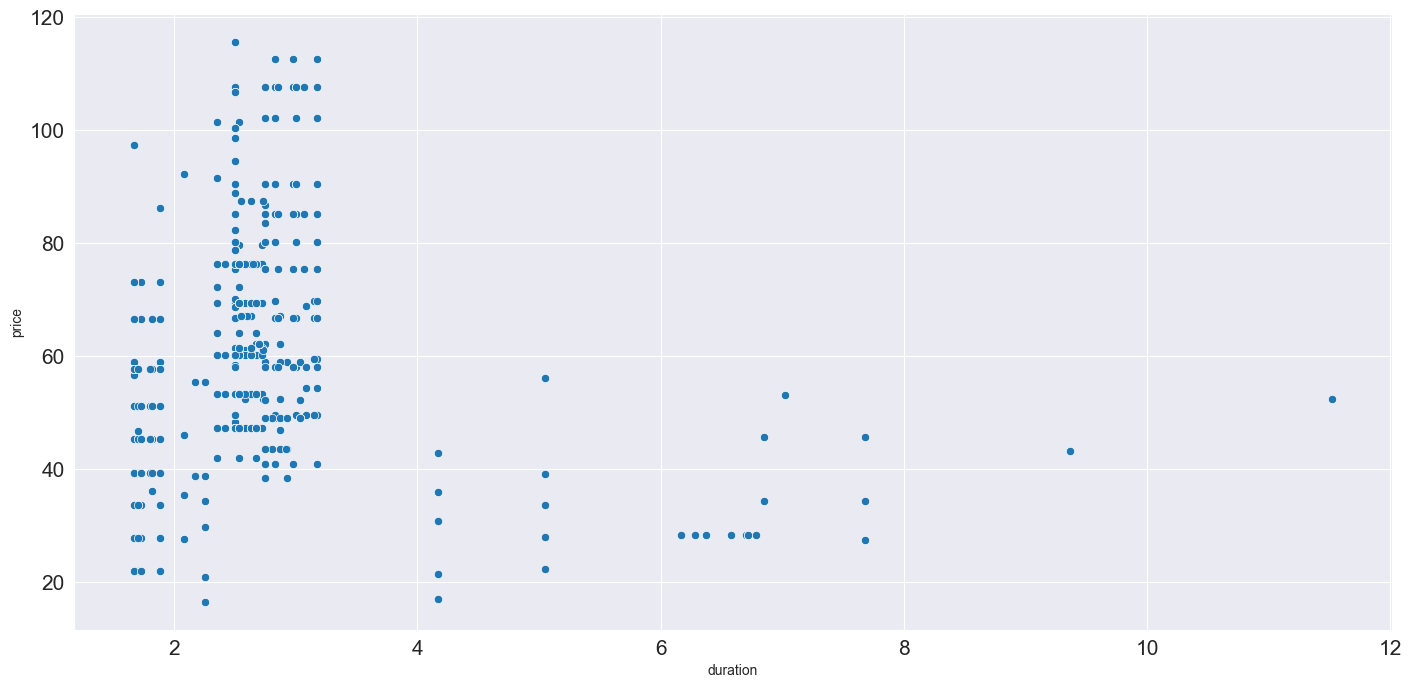

In [30]:
#Data exploratory
plt.figure(figsize=(17,8))
sns.scatterplot(data=filtered_df.sample(1500), x="duration", y="price");
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Categoric values

The destination preferred by the greatest number of people is printed below, ordered from highest to lowest and the frequency is graphed:

In [31]:
print(df["destination"].value_counts())

destination
BARCELONA    145254
SEVILLA      133012
VALENCIA     123706
MADRID        98028
Name: count, dtype: int64


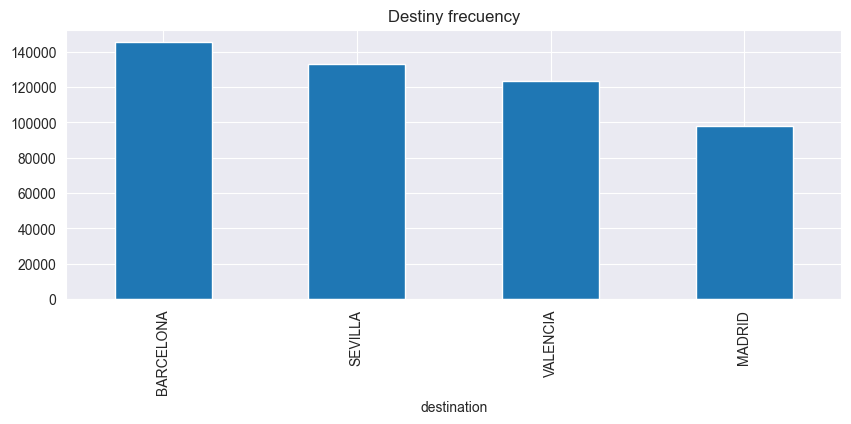

In [33]:
df["destination"].value_counts().plot(kind="bar", figsize=(10, 3.5), title="Destiny frecuency");

C:\Users\HECTOR\PycharmProjects\pythonProject4\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HECTOR\PycharmProjects\pythonProject4\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HECTOR\PycharmProjects\pythonProject4\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HECTOR\PycharmProjects\pythonProject4\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

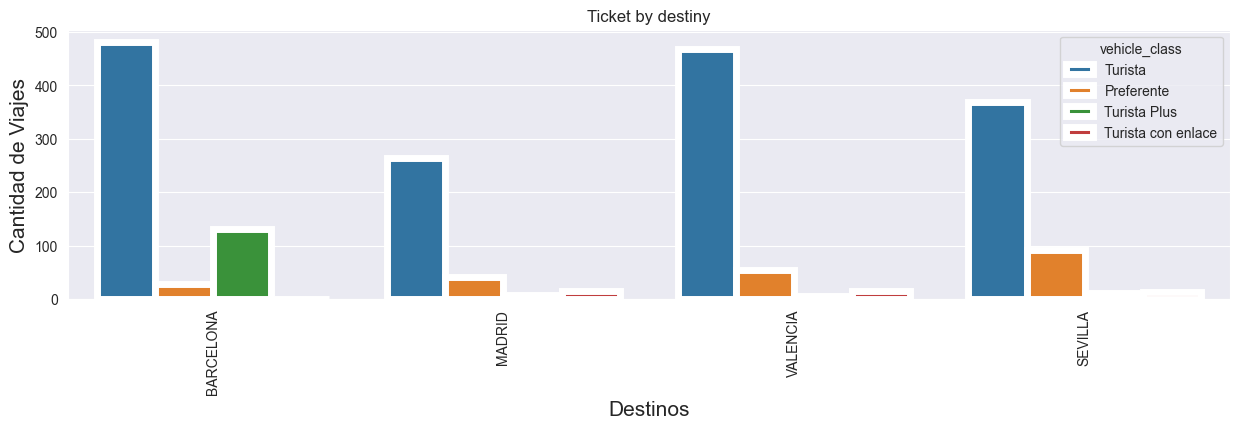

In [34]:
plt.figure(figsize=(15,3.5))
sns.countplot(x= 'destination', hue = 'vehicle_class', data = filtered_df.sample(2000),alpha=1.0,linewidth=5)
plt.title('Ticket by destiny')
plt.xticks(rotation='vertical')
plt.ylabel('Cantidad de Viajes', fontsize=15)
plt.xlabel('Destinos', fontsize=15)
plt.show()

## Conclusions <a class="anchor" id="first-bullet"></a>

Note: The data set turns out to be too large for analysis, so in several cases the execution was carried out with a data sample for analysis.

According to the structure of our data, and analyzing these according to their different compositions and relationships with other variables, once the null values were detected and the harmful outliers had been eliminated, the following findings were found:

1) Firstly, it is found according to the distribution of prices and, according to the graph of samples, that the prices that vary the most (and that contain their maximums) are in the range of a trip lasting 2 to 4 hours, which It helps us rule out the direct relationship between duration and price variations; That is to say, a longer trip duration does not determine a higher ticket price.
2) Consequently, the number of tickets according to travel origin is determined with a table ordered from highest to lowest, which is Madrid and Barcelona, the cities where the largest number of travel departures are. According to the subsequent graphs, the largest number of passengers are exchanged between the two cities; The determining factor and the most interesting thing is that the trips made between these two cities last between 2 and 4 hours, which means that the company varies its prices until reaching the maximum of all our records in several cases.
3) The preference of all cities is for the TOURIST type ticket, likewise, the Promo rate is the highest among the others.